In [1]:
from typing import List
import random

import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline

In [2]:
class InputNeuron:
    def __init__(self):
        self._value = None

    @property
    def value(self):
        return self._value

    @value.setter
    def value(self, value):
        self._value = value

In [ ]:
class MaxNetNeuron:
    e = 1/6

    def __init__(self, inp: 'HammingNeuron'):
        self._input = inp
        self._inputs = None
        self._value = None

    def set_inputs(self, inputs: List['MaxNetNeuron']):
        self._inputs = [i for i in inputs if self != i]

    @property
    def value(self):
        return self._value if self._value is not None else self._input.value

    @property
    def new_value(self):
        value = self.value-self.e*sum(inp.value for inp in self._inputs)
        return value if value > 0 else 0

    @value.setter
    def value(self, value):
        self._value = value

In [4]:
class HammingNeuron:
    k = 0.1
    U = 1 / k

    def __init__(self, inputs: List[InputNeuron], weights: List[float]):
        self.inputs = inputs
        self.weights = weights

    @property
    def value(self):
        u_in = len(self.inputs) / 2 + sum(inp.value * weight for inp, weight in zip(self.inputs, self.weights))

        if u_in < 0:
            return 0
        elif 0 <= u_in <= self.U:
            return u_in * self.k
        else:
            return u_in

In [27]:
class Network:
    def __init__(self, examples: list):
        self.input_layer = [InputNeuron() for i in range(0, len(examples[0]))]
        self.hamming_layer = [HammingNeuron(inputs=self.input_layer,
                                            weights=[(1 if cell != " " else -1) / 2 for cell in example])
                              for example in examples]
        self.max_net_layer = [MaxNetNeuron(inp) for inp in self.hamming_layer]
        for n in self.max_net_layer:
            n.set_inputs(self.max_net_layer)

    def run(self, example):
        # Устанавливаем состояния входных нейронов
        for inp_neuron, cell in zip(self.input_layer, example):
            inp_neuron.value = (1 if cell != " " else -1)

        # Выходные значения сети Хемминга
        
        print(" ".join([f"{i.value:.2f}" for i in self.hamming_layer]))
        ts = Series([i.value for i in self.hamming_layer], index=x_ax)
        ts.plot(kind='bar', figsize=(15, 1), color="black")
        plt.show()

        # Итерационный процесс MaxNet сети
        while True:
            new_values = [n.new_value for n in self.max_net_layer]

            if [n.value for n in self.max_net_layer] == new_values:
                break

            for n, new_value in zip(self.max_net_layer, new_values):
                n.value = new_value

            print(" ".join([f"{i.value:.2f}" for i in self.max_net_layer]))
            t = Series([i.value for i in self.max_net_layer], index=x_ax)
            t.plot(kind='bar', figsize=(15, 1), color="black")
            plt.show()


In [44]:
train_examples = [
    "####### "
    "##    ##"
    "##    ##"
    "##    ##"
    "##    ##"
    "##    ##"
    "####### ",

    "########"
    "##      "
    "##      "
    "######  "
    "##      "
    "##      "
    "########",

    "##    ##"
    "###   ##"
    "####  ##"
    "## ## ##"
    "##  ####"
    "##   ###"
    "##    ##",

    "  ####  "
    "   ##   "
    "   ##   "
    "   ##   "
    "   ##   "
    "   ##   "
    "  ####  ",

    " ###### "
    "##    ##"
    "##      "
    " ###### "
    "      ##"
    "##    ##"
    " ###### ",

    "##....##"
    "###..###"
    "########"
    "##.##.##"
    "##....##"
    "##....##"
    "##....##"
]
x_ax = ["D", "E", "N", "I", "S", "M"]


In [ ]:
def noisy(example,level):
    new_example = ""
    for i in range(0, len(example)):
        if random.random() < level:
            new_example += random.choice([" ", "#"])
        else:
            new_example+= example[i]
    return new_example

 ##### #
###   # 
##      
# ####  
### #   
##      
## #  ##

32.00 46.00 32.00 26.00 36.00 28.00


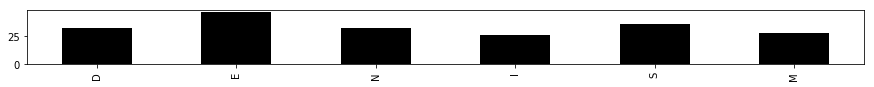

0.00 15.20 0.00 0.00 3.20 0.00


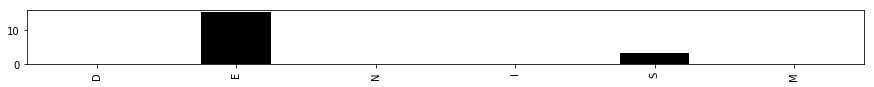

0.00 14.56 0.00 0.00 0.16 0.00


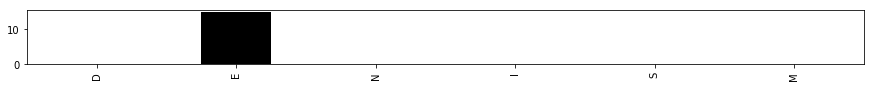

0.00 14.53 0.00 0.00 0.00 0.00


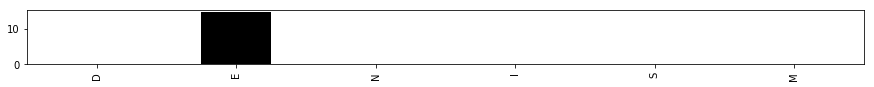

In [51]:
network = Network(train_examples)
example = noisy(train_examples[1], 0.4)
print("\n".join(example[i*8:i*8+8] for i in range(8)))
network.run(example)